In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
ls -tr

README.md                            fr2_sample_2_z_space_20.png
VAE_FIRST_NON_GPU_Conf2_0_v1.ipynb   fr2_sample_2_z_space_0.png
VAE_FRI_AND_FRII_FIRST.ipynb         fr2_sample_2_z_space_10.png
VAE_MNIST_FIRST_NON_GPU_v1.ipynb     data_supervised_dropout_experiment.csv
VAE_example.ipynb                    8_EXPERIMENT_3_INFERENCE.ipynb
FRDEEP.py                            7_EXPERMIMENT_2_HEATMAP.ipynb
torchsummary.py                      utils/
genetic_algorithm/                   model.mod
FIRST_data/                          model_unsup_2
output_logs/                         model_unsup_opt_2
plots.py                             0_FIRST_IMAGE_NUMPY_x.np.npy
models.py                            0_FIRST_IMAGE_NUMPY_y.np.npy
frdeep_hmt.py                        10_RADIO_INCEPTION_SCORE_INFERENCE.ipynb
model_1.out                          1_0_VAE_UNSUP_FIRST.ipynb
image_classifier.ipynb               data_topaste.csv
VAE_MAIN_MNIST.ipynb                 data_unsupervised.csv
hmt/        

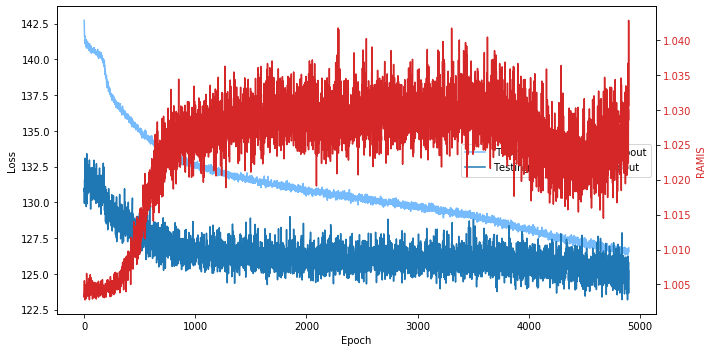

In [124]:

data=pd.read_csv("data_unsupervised_pa0_test_d32.csv",delimiter=",")

# Create some mock data

fig, ax1 = plt.subplots(figsize=(10,5))
i=4900
j=1
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data['Epoch'][j:i], data['Train_Loss'][j:i],'-',label=' Training Loss without Dropout', color='xkcd:sky blue')
ax1.plot(data['Epoch'][j:i], data['Test_Loss'][j:i],'-', label='Testing Loss without Dropout',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('RAMIS', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Epoch'][j:i], data['Inception_score'][j:i], label='Inception Score',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,50],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

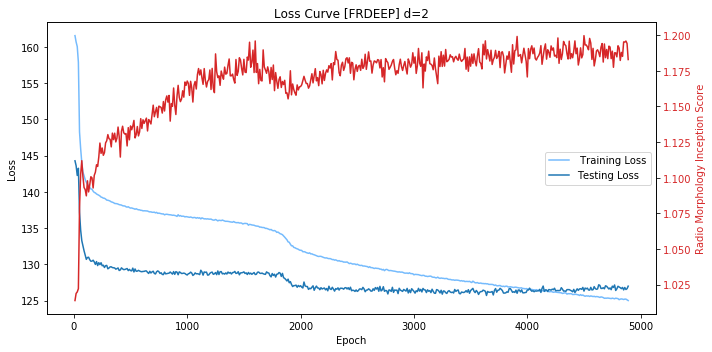

In [128]:

data=pd.read_csv("data_unsupervised_pa0_test_d2.csv",delimiter=",")

n=int(4900/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=2')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

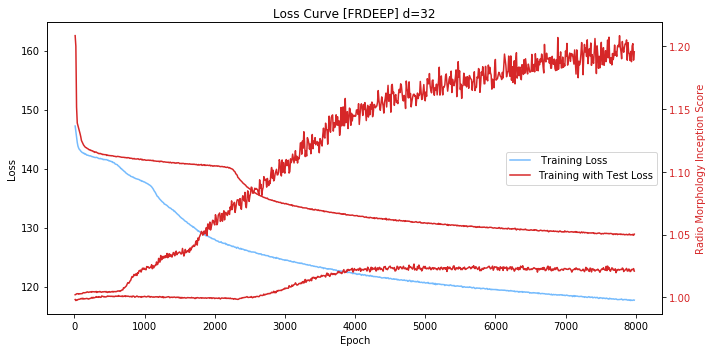

In [51]:
data_wtest=pd.read_csv("data_unsupervised_pa0_test_d32.csv",delimiter=",")
data = pd.read_csv("data_unsupervised_pa0_d32.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T
data_3 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)
data_3 = pd.DataFrame(data_3, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

for i in range (1,n):
     data_3['Epoch'][i] = i*10
     data_3['Avg_Train_Loss'][i]=np.mean(data_wtest['Train_Loss'][i*10:(i*10)+10])
     data_3['Avg_Test_Loss'][i]=np.mean(data_wtest['Test_Loss'][i*10:(i*10)+10])
     data_3['Avg_inception'][i]=np.mean(data_wtest['Inception_score'][i*10:(i*10)+10])

nx = 799
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_3['Epoch'][1:nx], data_3['Avg_Train_Loss'][1:nx],'-', label='Training with Test Loss',color='tab:red')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=32')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax2.plot(data_3['Epoch'][1:nx], data_3['Avg_inception'][1:nx]-0.005, label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

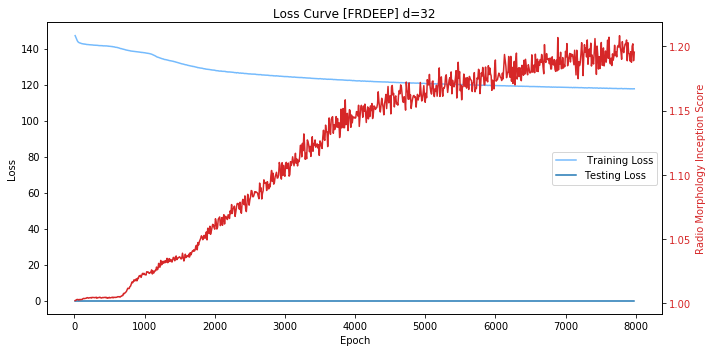

In [27]:

data=pd.read_csv("data_unsupervised_pa0_d32.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=32')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

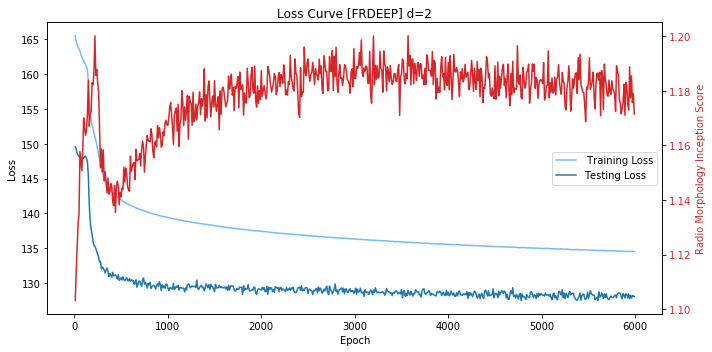

In [194]:
data=pd.read_csv("data_unsupervised.csv",delimiter=",")

n=int(6000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=2')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

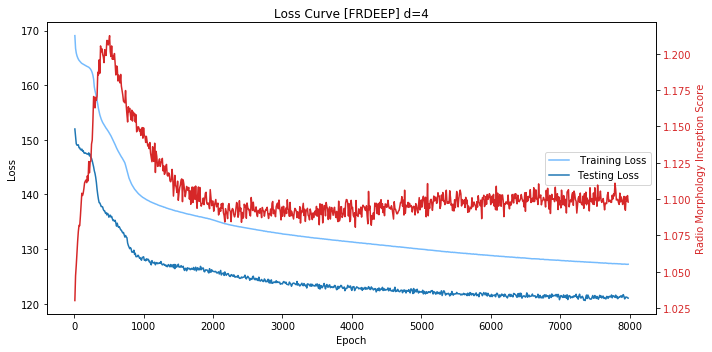

In [60]:
data=pd.read_csv("data_unsupervised_d4_0_0014.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=4')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

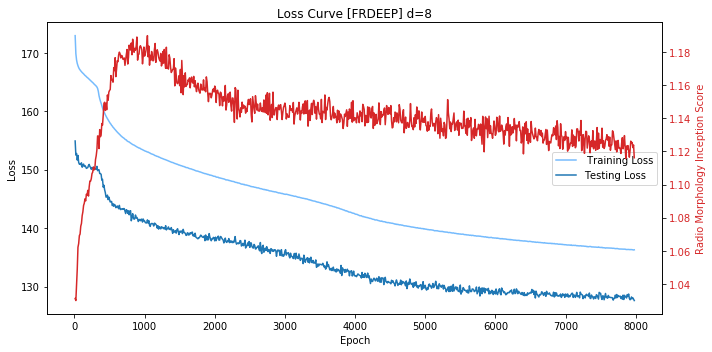

In [62]:
data=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=8')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

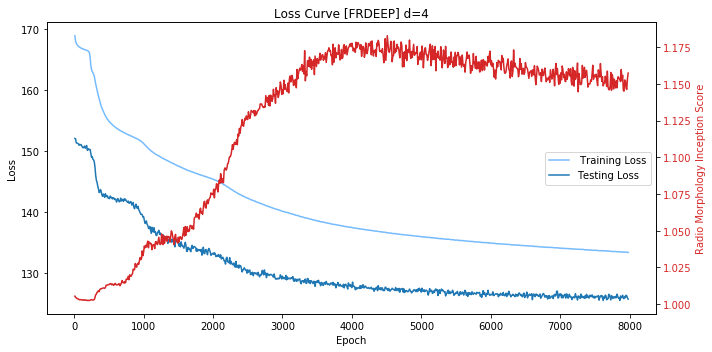

In [59]:


data=pd.read_csv("data_supervised_d32.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=4')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [103]:
16+8

24

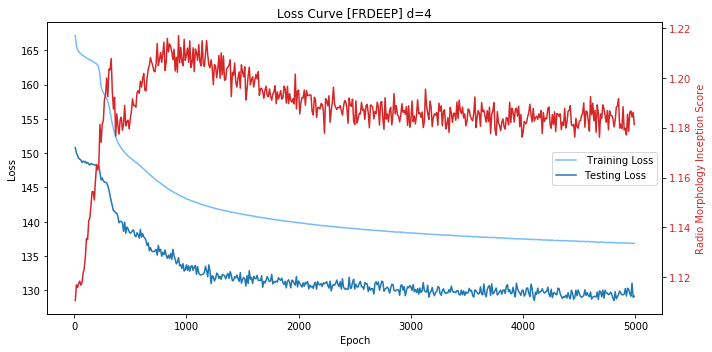

In [65]:


data=pd.read_csv("data_supervised_d2.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=4')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [67]:
data=pd.read_csv("data_supervised_d2.csv",delimiter=",")

In [68]:
data

,Unnamed: 0,Epoch,Train_Loss,Test_Loss,Sigma_clipped,Inception_score,number_FR1,number_FR2
0,0,0.0,388.081273,165.901394,4.569380,1.008284,2.0,100.0
1,1,1.0,184.865810,164.898156,3.103780,1.010283,2.0,98.0
2,2,2.0,184.130153,159.933583,2.134090,1.010288,5.0,99.0
3,3,3.0,183.728430,163.044046,1.692535,1.012348,6.0,98.0
4,4,4.0,183.227006,160.380849,2.091295,1.007987,2.0,99.0
...,...,...,...,...,...,...,...,...
7995,7995,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7996,7996,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7997,7997,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7998,7998,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


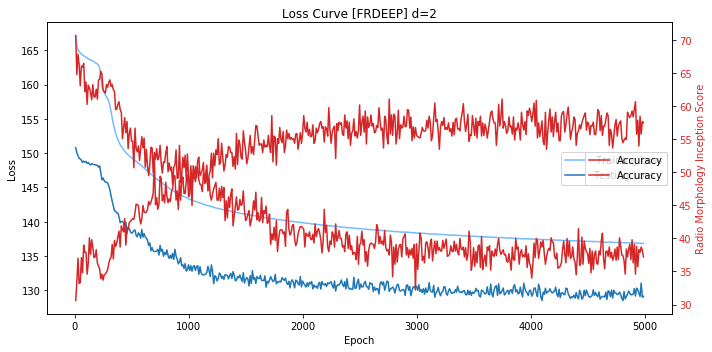

In [71]:


data=pd.read_csv("data_supervised_d2.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])
    
    

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
plt.title('Loss Curve [FRDEEP] d=2')
ax2.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'][1:], data_2['Avg_FRI'][1:], label='Accuracy',color=color)
ax2.plot(data_2['Epoch'][1:], data_2['Avg_FRII'][1:], label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
ax2.legend(loc='center right')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

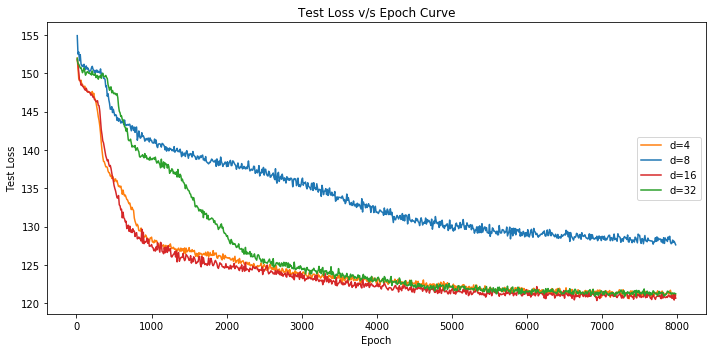

In [223]:
data_d2=pd.read_csv("data_unsupervised.csv",delimiter=",")
data_d4=pd.read_csv("data_unsupervised_d4_0_0014.csv",delimiter=",")
data_d8=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")
data_d16=pd.read_csv("data_unsupervised_d16.csv",delimiter=",")
data_d32=pd.read_csv("data_unsupervised_d32.csv",delimiter=",")

n=int(7990/10)
data_2 = np.zeros((2,n)).T

variable = 'Test_Loss'

variable_avg = 'Avg_Test_Loss'


columns = ['Epoch',variable_avg]

data_d2_pd = pd.DataFrame(data_2, columns=columns)
data_d4_pd = pd.DataFrame(data_2, columns=columns)
data_d8_pd = pd.DataFrame(data_2, columns=columns)
data_d16_pd = pd.DataFrame(data_2, columns=columns)
data_d32_pd = pd.DataFrame(data_2, columns=columns)


fig, ax1 = plt.subplots(figsize=(10,5))


#---------------------------------------------Plotting d=4---------------------------------------------------
for i in range (1,n):
     data_d4_pd['Epoch'][i] = i*10
     data_d4_pd[variable_avg][i]=np.mean(data_d4[variable][i*10:(i*10)+10])
    
color = 'tab:orange'
ax1.plot(data_d4_pd['Epoch'][1:], data_d4_pd[variable_avg][1:],'-',label='d=4', color=color)


#---------------------------------------------Plotting d=8---------------------------------------------------



for i in range (1,n):
     data_d8_pd['Epoch'][i] = i*10
     data_d8_pd[variable_avg][i]=np.mean(data_d8[variable][i*10:(i*10)+10])
    
    
color = 'tab:blue'
ax1.plot(data_d8_pd['Epoch'][1:], data_d8_pd[variable_avg][1:],'-',label='d=8', color=color)


#---------------------------------------------Plotting d=16---------------------------------------------------
    
for i in range (1,n):
     data_d16_pd['Epoch'][i] = i*10
     data_d16_pd[variable_avg][i]=np.mean(data_d16[variable][i*10:(i*10)+10])
    

color = 'tab:red'
ax1.plot(data_d16_pd['Epoch'][1:n], data_d16_pd[variable_avg][1:n],'-',label='d=16', color=color)

#---------------------------------------------Plotting d=32---------------------------------------------------


for i in range (1,n):
     data_d32_pd['Epoch'][i] = i*10
     data_d32_pd[variable_avg][i]=np.mean(data_d32[variable][i*10:(i*10)+10])

color = 'tab:green'
ax1.plot(data_d32_pd['Epoch'][1:n], data_d32_pd[variable_avg][1:n],'-',label='d=32', color=color)
    

plt.title('Test Loss v/s Epoch Curve')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Test Loss')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')





fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [207]:
data_d4_pd

,Epoch,Avg_Train_Loss
0,0.0,0.000000
1,10.0,168.419605
2,20.0,167.516199
3,30.0,167.138914
4,40.0,166.933980
...,...,...
794,7940.0,128.381118
795,7950.0,128.383263
796,7960.0,128.403736
797,7970.0,128.341982


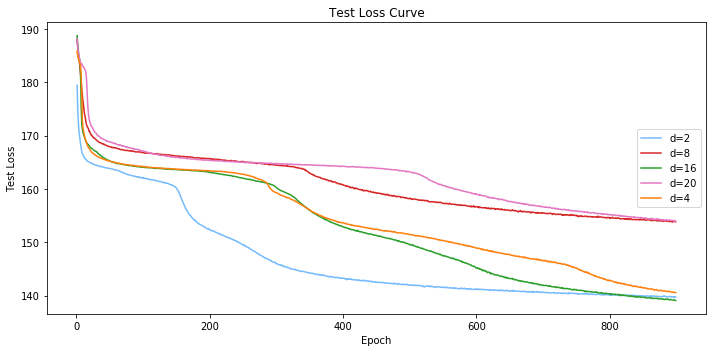

In [196]:
data_d2=pd.read_csv("data_unsupervised.csv",delimiter=",")
data_d4=pd.read_csv("data_unsupervised_d4_0_0014.csv",delimiter=",")
data_d8=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")
data_d16=pd.read_csv("data_unsupervised_d16.csv",delimiter=",")
data_d20=pd.read_csv("data_unsupervised_d20.csv",delimiter=",")
data_d32=pd.read_csv("data_unsupervised_d32.csv",delimiter=",")

n_10 = 900




fig, ax1 = plt.subplots(figsize=(10,5))

color = 'xkcd:sky blue'
ax1.plot(data_d2['Epoch'][1:n_10], data_d2['Train_Loss'][1:n_10],'-',label='d=2', color=color)

color = 'tab:red'
ax1.plot(data_d8['Epoch'][1:n_10], data_d8['Train_Loss'][1:n_10],'-',label='d=8', color=color)

color = 'tab:green'
ax1.plot(data_d16['Epoch'][1:n_10], data_d16['Train_Loss'][1:n_10],'-',label='d=16', color=color)


color = 'tab:pink'
ax1.plot(data_d20['Epoch'][1:n_10], data_d20['Train_Loss'][1:n_10],'-',label='d=20', color=color)


color = 'tab:orange'
ax1.plot(data_d4['Epoch'][1:n_10], data_d4['Train_Loss'][1:n_10],'-',label='d=4', color=color)


ax1.set_xlabel('Epoch')
ax1.set_ylabel('Test Loss')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')
plt.title('Test Loss Curve')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [193]:
data_d20_lr=pd.read_csv("data_lr_experiment_d20.csv",delimiter=",")
data_d20=pd.read_csv("data_unsupervised_d20.csv",delimiter=",")

In [194]:
i = 10

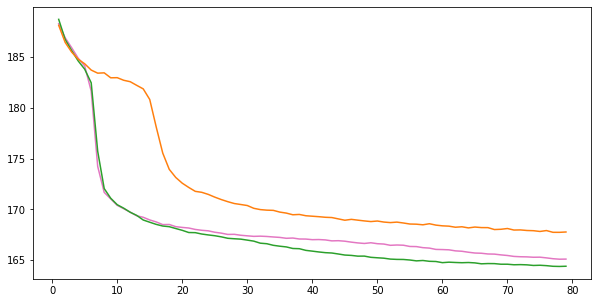

In [195]:
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:pink'
ax1.plot(data_d20_lr[data_d20_lr['k']==i]['epoch'][1:80], data_d20_lr[data_d20_lr['k']==i]['train_loss'][1:80],'-',label='d=20', color=color)  
color = 'tab:green'
ax1.plot(data_d16['Epoch'][1:80], data_d16['Train_Loss'][1:80],'-',label='d=16', color=color)
color = 'tab:orange'
ax1.plot(data_d20['Epoch'][1:80], data_d20['Train_Loss'][1:80],'-',label='d=4', color=color)
plt.show()
i=i+1

In [191]:
data_d20_lr[data_d20_lr['k']==11]['learning_rate']

880    0.000844
881    0.000844
882    0.000844
883    0.000844
884    0.000844
         ...   
955    0.000844
956    0.000844
957    0.000844
958    0.000844
959    0.000844
Name: learning_rate, Length: 80, dtype: float64

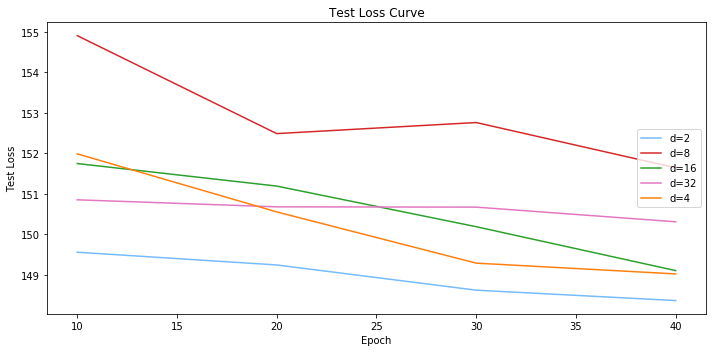

In [14]:
data_d2=pd.read_csv("data_unsupervised.csv",delimiter=",")
data_d4=pd.read_csv("data_unsupervised_d4.csv",delimiter=",")
data_d8=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")
data_d16=pd.read_csv("data_unsupervised_d16.csv",delimiter=",")

data_d32=pd.read_csv("data_unsupervised_d20.csv",delimiter=",")
n_10 = 50
n=int(n_10/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_d2_pd = pd.DataFrame(data_2, columns=columns)
data_d8_pd = pd.DataFrame(data_2, columns=columns)
data_d16_pd = pd.DataFrame(data_2, columns=columns)




i=0
for i in range (1,n):
     data_d2_pd['Epoch'][i] = i*10
     data_d2_pd['Avg_Train_Loss'][i]=np.mean(data_d2['Train_Loss'][i*10:(i*10)+10])
     data_d2_pd['Avg_Test_Loss'][i]=np.mean(data_d2['Test_Loss'][i*10:(i*10)+10])
     data_d2_pd['Avg_inception'][i]=np.mean(data_d2['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'

ax1.plot(data_d2_pd['Epoch'][1:], data_d2_pd['Avg_Test_Loss'][1:],'-',label='d=2', color='xkcd:sky blue')



i=0
for i in range (1,n):
     data_d8_pd['Epoch'][i] = i*10
     data_d8_pd['Avg_Train_Loss'][i]=np.mean(data_d8['Train_Loss'][i*10:(i*10)+10])
     data_d8_pd['Avg_Test_Loss'][i]=np.mean(data_d8['Test_Loss'][i*10:(i*10)+10])
     data_d8_pd['Avg_inception'][i]=np.mean(data_d8['Inception_score'][i*10:(i*10)+10])


color = 'tab:red'

ax1.plot(data_d8_pd['Epoch'][1:], data_d8_pd['Avg_Test_Loss'][1:],'-',label='d=8', color=color)



i=0
for i in range (1,n):
     data_d16_pd['Epoch'][i] = i*10
     data_d16_pd['Avg_Train_Loss'][i]=np.mean(data_d16['Train_Loss'][i*10:(i*10)+10])
     data_d16_pd['Avg_Test_Loss'][i]=np.mean(data_d16['Test_Loss'][i*10:(i*10)+10])
     data_d16_pd['Avg_inception'][i]=np.mean(data_d16['Inception_score'][i*10:(i*10)+10])


color = 'tab:green'

ax1.plot(data_d16_pd['Epoch'][1:], data_d16_pd['Avg_Test_Loss'][1:],'-',label='d=16', color=color)



n=int(n_10/10)

data_d32_pd = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_d32_pd['Epoch'][i] = i*10
     data_d32_pd['Avg_Train_Loss'][i]=np.mean(data_d32['Train_Loss'][i*10:(i*10)+10])
     data_d32_pd['Avg_Test_Loss'][i]=np.mean(data_d32['Test_Loss'][i*10:(i*10)+10])
     data_d32_pd['Avg_inception'][i]=np.mean(data_d32['Inception_score'][i*10:(i*10)+10])



ax1.plot(data_d16_pd['Epoch'][1:n], data_d16_pd['Avg_Test_Loss'][1:n],'-',label='d=32', color='tab:pink')



n=int(n_10/10)

data_d4=pd.read_csv("data_unsupervised_d4_0_0014.csv",delimiter=",")

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_d4_pd = pd.DataFrame(data_2, columns=columns)


i=0
for i in range (1,n):
     data_d4_pd['Epoch'][i] = i*10
     data_d4_pd['Avg_Train_Loss'][i]=np.mean(data_d4['Train_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_Test_Loss'][i]=np.mean(data_d4['Test_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_inception'][i]=np.mean(data_d4['Inception_score'][i*10:(i*10)+10])

color = 'tab:orange'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Test Loss')
ax1.plot(data_d4_pd['Epoch'][1:], data_d4_pd['Avg_Test_Loss'][1:],'-',label='d=4', color=color)
ax1.tick_params(axis='y')
ax1.legend(loc='center right')





plt.title('Test Loss Curve')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

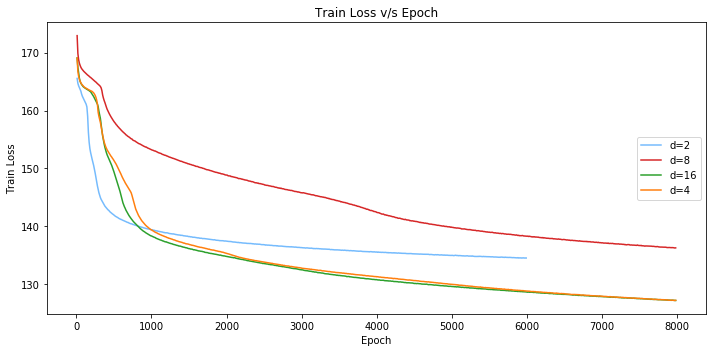

In [74]:
data_d2=pd.read_csv("data_unsupervised.csv",delimiter=",")
data_d4=pd.read_csv("data_unsupervised_d4.csv",delimiter=",")
data_d8=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")
data_d32=pd.read_csv("data_unsupervised_d16.csv",delimiter=",")



n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_d2_pd = pd.DataFrame(data_2, columns=columns)
data_d8_pd = pd.DataFrame(data_2, columns=columns)
data_d32_pd = pd.DataFrame(data_2, columns=columns)



i=0
for i in range (1,n):
     data_d2_pd['Epoch'][i] = i*10
     data_d2_pd['Avg_Train_Loss'][i]=np.mean(data_d2['Train_Loss'][i*10:(i*10)+10])
     data_d2_pd['Avg_Test_Loss'][i]=np.mean(data_d2['Test_Loss'][i*10:(i*10)+10])
     data_d2_pd['Avg_inception'][i]=np.mean(data_d2['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'

ax1.plot(data_d2_pd['Epoch'][1:], data_d2_pd['Avg_Train_Loss'][1:],'-',label='d=2', color='xkcd:sky blue')


i=0
for i in range (1,n):
     data_d8_pd['Epoch'][i] = i*10
     data_d8_pd['Avg_Train_Loss'][i]=np.mean(data_d8['Train_Loss'][i*10:(i*10)+10])
     data_d8_pd['Avg_Test_Loss'][i]=np.mean(data_d8['Test_Loss'][i*10:(i*10)+10])
     data_d8_pd['Avg_inception'][i]=np.mean(data_d8['Inception_score'][i*10:(i*10)+10])


color = 'tab:red'

ax1.plot(data_d8_pd['Epoch'][1:], data_d8_pd['Avg_Train_Loss'][1:],'-',label='d=8', color=color)


i=0
for i in range (1,n):
     data_d32_pd['Epoch'][i] = i*10
     data_d32_pd['Avg_Train_Loss'][i]=np.mean(data_d32['Train_Loss'][i*10:(i*10)+10])
     data_d32_pd['Avg_Test_Loss'][i]=np.mean(data_d32['Test_Loss'][i*10:(i*10)+10])
     data_d32_pd['Avg_inception'][i]=np.mean(data_d32['Inception_score'][i*10:(i*10)+10])


color = 'tab:green'

ax1.plot(data_d32_pd['Epoch'][1:], data_d32_pd['Avg_Train_Loss'][1:],'-',label='d=16', color=color)



n=int(7990/10)

data_d4=pd.read_csv("data_unsupervised_d4_0_0014.csv",delimiter=",")

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_d4_pd = pd.DataFrame(data_2, columns=columns)


i=0
for i in range (1,n):
     data_d4_pd['Epoch'][i] = i*10
     data_d4_pd['Avg_Train_Loss'][i]=np.mean(data_d4['Train_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_Test_Loss'][i]=np.mean(data_d4['Test_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_inception'][i]=np.mean(data_d4['Inception_score'][i*10:(i*10)+10])

color = 'tab:orange'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss')
ax1.plot(data_d4_pd['Epoch'][1:], data_d4_pd['Avg_Train_Loss'][1:],'-',label='d=4', color=color)
ax1.tick_params(axis='y')
ax1.legend(loc='center right')

plt.title('Train Loss v/s Epoch')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

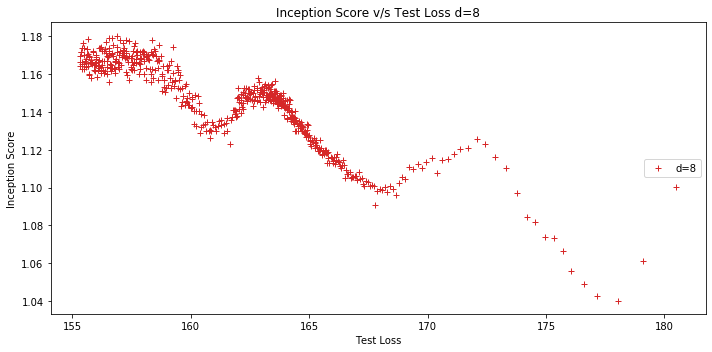

In [235]:
data_d2=pd.read_csv("data_unsupervised.csv",delimiter=",")
data_d4=pd.read_csv("data_unsupervised_d4.csv",delimiter=",")
data_d8=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")
data_d32=pd.read_csv("data_unsupervised_d16.csv",delimiter=",")



n=int(6000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_d2_pd = pd.DataFrame(data_2, columns=columns)
data_d8_pd = pd.DataFrame(data_2, columns=columns)
data_d32_pd = pd.DataFrame(data_2, columns=columns)



i=0
for i in range (1,n):
     data_d2_pd['Epoch'][i] = i*10
     data_d2_pd['Avg_Train_Loss'][i]=np.mean(data_d2['Train_Loss'][i*10:(i*10)+10])
     data_d2_pd['Avg_Test_Loss'][i]=np.mean(data_d2['Test_Loss'][i*10:(i*10)+10])
     data_d2_pd['Avg_inception'][i]=np.mean(data_d2['Inception_score'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'

#ax1.plot(data_d2_pd['Avg_inception'][1:], data_d2_pd['Avg_Test_Loss'][1:],'+',label='d=2', color='xkcd:sky blue')


i=0
for i in range (1,n):
     data_d8_pd['Epoch'][i] = i*10
     data_d8_pd['Avg_Train_Loss'][i]=np.mean(data_d8['Train_Loss'][i*10:(i*10)+10])
     data_d8_pd['Avg_Test_Loss'][i]=np.mean(data_d8['Test_Loss'][i*10:(i*10)+10])
     data_d8_pd['Avg_inception'][i]=np.mean(data_d8['Inception_score'][i*10:(i*10)+10])


color = 'tab:red'

ax1.plot(data_d8_pd['Avg_Train_Loss'][1:],data_d8_pd['Avg_inception'][1:],'+',label='d=8', color=color)


i=0
for i in range (1,n):
     data_d32_pd['Epoch'][i] = i*10
     data_d32_pd['Avg_Train_Loss'][i]=np.mean(data_d32['Train_Loss'][i*10:(i*10)+10])
     data_d32_pd['Avg_Test_Loss'][i]=np.mean(data_d32['Test_Loss'][i*10:(i*10)+10])
     data_d32_pd['Avg_inception'][i]=np.mean(data_d32['Inception_score'][i*10:(i*10)+10])


color = 'tab:green'

#ax1.plot(data_d32_pd['Avg_inception'][1:], data_d32_pd['Avg_Test_Loss'][1:],'+',label='d=32', color=color)



n=int(3000/10)

data_d4=pd.read_csv("data_unsupervised_d4.csv",delimiter=",")

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_d4_pd = pd.DataFrame(data_2, columns=columns)


i=0
for i in range (1,n):
     data_d4_pd['Epoch'][i] = i*10
     data_d4_pd['Avg_Train_Loss'][i]=np.mean(data_d4['Train_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_Test_Loss'][i]=np.mean(data_d4['Test_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_inception'][i]=np.mean(data_d4['Inception_score'][i*10:(i*10)+10])

color = 'tab:orange'
ax1.set_xlabel('Test Loss')
ax1.set_ylabel('Inception Score')
#ax1.plot(data_d4_pd['Avg_inception'][1:], data_d4_pd['Avg_Test_Loss'][1:],'+',label='d=4', color=color)
ax1.tick_params(axis='y')
ax1.legend(loc='center right')

plt.title('Inception Score v/s Test Loss d=8')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

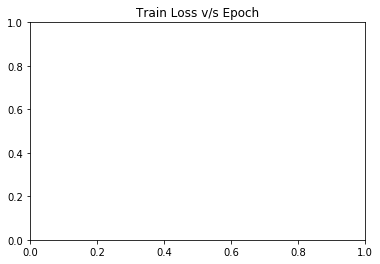

In [231]:
data_d4=pd.read_csv("data_lr_experiment_d8.csv",delimiter=",")



n=int(6000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_d4_pd = pd.DataFrame(data_2, columns=columns)




i=0
for i in range (1,n):
     data_d4_pd['Epoch'][i] = i*10
     data_d4_pd['Avg_Train_Loss'][i]=np.mean(data_d4['Train_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_Test_Loss'][i]=np.mean(data_d4['Test_Loss'][i*10:(i*10)+10])
     data_d4_pd['Avg_inception'][i]=np.mean(data_d4['Inception_score'][i*10:(i*10)+10])

color = 'tab:orange'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss')
ax1.plot(data_d4_pd['Avg_inception'][1:], data_d4_pd['Avg_Test_Loss'][1:],label='d=4', color=color)
ax1.tick_params(axis='y')
ax1.legend(loc='center right')

plt.title('Train Loss v/s Epoch')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

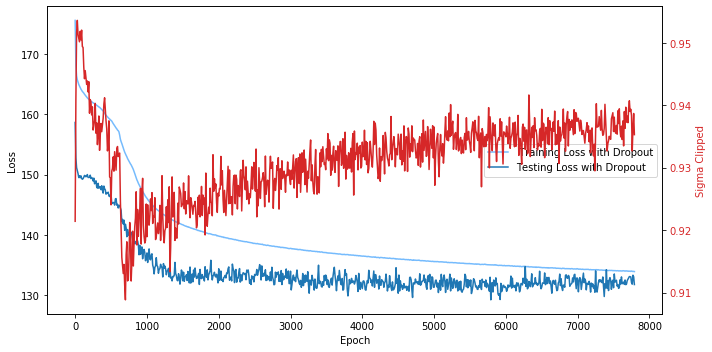

In [5]:

data=pd.read_csv("data_supervised_dropout_3.csv",delimiter=",")

n=int(7800/10)

data_2 = np.zeros((5,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (0,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_Sigma_clipped'][i]=np.mean(data['Sigma_clipped'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'], data_2['Avg_Train_Loss'],'-',label=' Training Loss with Dropout', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'], data_2['Avg_Test_Loss'],'-', label='Testing Loss with Dropout',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('Sigma Clipped', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'], data_2['Avg_Sigma_clipped']/100000, label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

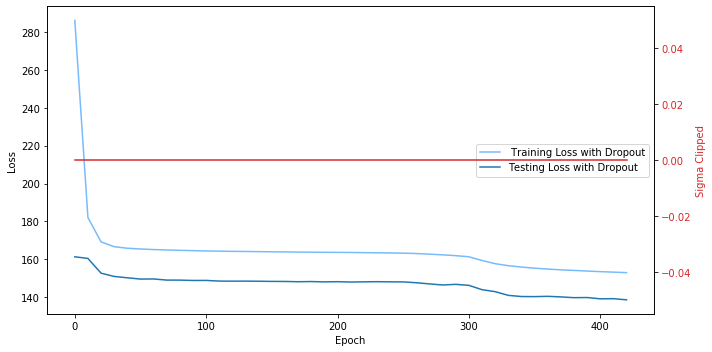

In [25]:

data=pd.read_csv("data_supervised_d4.csv",delimiter=",")

n=int(430/10)

data_2 = np.zeros((5,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (0,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_Sigma_clipped'][i]=np.mean(data['Sigma_clipped'][i*10:(i*10)+10])

fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(data_2['Epoch'], data_2['Avg_Train_Loss'],'-',label=' Training Loss with Dropout', color='xkcd:sky blue')
ax1.plot(data_2['Epoch'], data_2['Avg_Test_Loss'],'-', label='Testing Loss with Dropout',color='tab:blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('Sigma Clipped', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2['Epoch'], data_2['Avg_Sigma_clipped']/100000, label='Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,2000],[130,130],'--',color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [215]:
data_supervised_dropout_experiment.csv

,Epoch,Avg_Train_Loss,Avg_Test_Loss,Avg_Sigma_clipped,Avg_VAE_efficiency,Avg_Train_loss,Avg_Test_loss
0,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
1,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
2,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
3,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
4,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
...,...,...,...,...,...,...,...
19995,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
19996,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
19997,5990,NaN,NaN,NaN,NaN,157.317807,144.169686
19998,5990,NaN,NaN,NaN,NaN,157.317807,144.169686


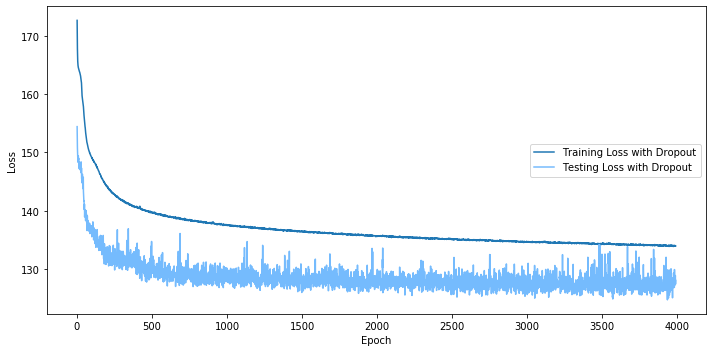

In [12]:

data_2=pd.read_csv("data_unsupervised.csv",delimiter=",")
data=pd.read_csv("data_unsupervised_2.csv",delimiter=",")

# Create some mock data

fig, ax1 = plt.subplots(figsize=(10,5))
i=3990
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
#ax1.plot(data['Epoch'][1:i], data['Train_Loss'][1:i],'-',label=' Training Loss without Dropout', color='xkcd:sky blue')
#ax1.plot(data['Epoch'][1:i], data['Test_Loss'][1:i],'-', label='Testing Loss without Dropout',color='tab:blue')
ax1.plot(data_2['Epoch'][1:i], data_2['Train_Loss'][1:i],'-',label='Training Loss with Dropout', color='tab:blue')
ax1.plot(data_2['Epoch'][1:i], data_2['Test_Loss'][1:i],'-', label='Testing Loss with Dropout',color='xkcd:sky blue')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

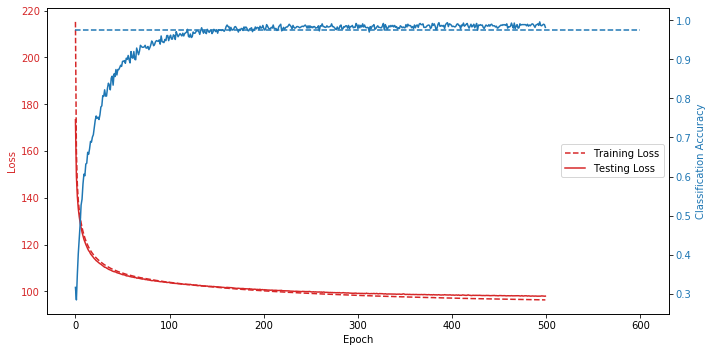

In [52]:
# Create some mock data

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(data['epoch'], data['training_loss'],'--',label='Training Loss', color=color)
ax1.plot(data['epoch'], data['testing_loss'],'-', label='Testing Loss',color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='center right')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Classification Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(data['epoch'], data['accuracy'], label='Accuracy',color=color)
ax2.plot([0,600],[0.9755,0.9755],'--',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0, 0.5, 'Classification Accuracy')

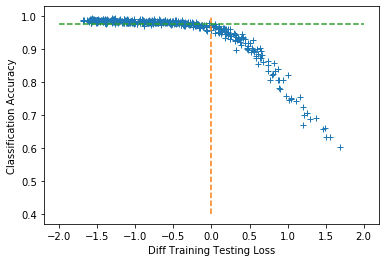

In [54]:
plt.plot(data['diff'][10:500],data['accuracy'][10:500],'+')
plt.plot([0.0,0.0],[0.4,1.0],'--')
plt.plot([-2,2],[0.9755,0.9755],'--')
plt.xlabel('Diff Training Testing Loss')
plt.ylabel('Classification Accuracy')

In [27]:
data['diff']=data['training_loss']-data['testing_loss']

In [63]:
ls -tr

README.md                            optimizer_main_sup_3
VAE_FIRST_NON_GPU_Conf2_0_v1.ipynb   data_supervised_dropout_3.csv
VAE_FRI_AND_FRII_FIRST.ipynb         data.npy
VAE_MNIST_FIRST_NON_GPU_v1.ipynb     experiment_1/
VAE_example.ipynb                    utils.tar.gz
FRDEEP.py                            first/
torchsummary.py                      6_EXPERIMENT_1.ipynb
genetic_algorithm/                   5_VAE_FIRST_INFER_UNSUP.ipynb
FIRST_data/                          test.png
output_logs/                         2_VAE_MAIN_INFER_FIRST.ipynb
plots.py                             untitled2.txt
models.py                            heat_map.csv
frdeep_hmt.py                        heat_map_2.csv
model_1.out                          fr1_sample_2_z_space_30.png
image_classifier.ipynb               fr2_sample_2_z_space_30.png
VAE_MAIN_MNIST.ipynb                 fr1_sample_2_z_space_40.png
hmt/                                 fr2_sample_2_z_space_40.png
__pycache__/                      

In [65]:

data=pd.read_csv("INCEPTION_CNN_CSV.csv",delimiter=",")


In [66]:
data

,epoch,train_loss,train_accuracy,validation_loss,validation_accuracy,validation_error,test_accuracy,fr1_accuracy,fr2_accuracy
0,0,2.189809,0.530032,0.793507,0.418251,58.174861,48,100,7
1,1,1.120090,0.557224,0.683077,0.517741,48.225881,58,100,25
2,2,0.955731,0.583157,0.654203,0.563404,43.659554,70,100,46
3,3,1.159760,0.606696,0.622792,0.636062,36.393784,78,95,64
4,4,0.408776,0.623377,0.606753,0.664239,33.576066,82,95,71
5,5,0.714187,0.642330,0.583187,0.708789,29.121057,84,95,75
6,6,0.773940,0.661242,0.568711,0.718182,28.181818,88,95,82
7,7,1.040147,0.672687,0.560912,0.736943,26.305658,86,90,82
8,8,0.495133,0.691153,0.551996,0.736248,26.375231,86,90,82
9,9,0.931325,0.700325,0.544636,0.745640,25.435992,86,90,82


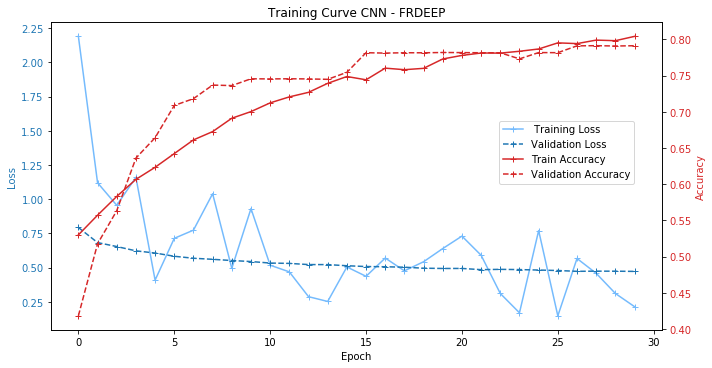

In [118]:
# Create some mock data

fig, ax1 = plt.subplots(figsize=(10,5))
i=30
j=0
color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss',color=color)
ax1.plot(data['epoch'][j:i], data['train_loss'][j:i],'+-',label=' Training Loss', color='xkcd:sky blue')
ax1.plot(data['epoch'][j:i], data['validation_loss'][j:i],'+--', label='Validation Loss',color='tab:blue')
ax1.tick_params(axis='y',labelcolor=color)
#ax1.legend(loc='center right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(data['epoch'][j:i], data['train_accuracy'][j:i],'+-', label='Train Accuracy',color=color)
ax2.plot(data['epoch'][j:i], data['validation_accuracy'][j:i],'+--', label='Validation Accuracy',color=color)
#ax2.plot(data['Epoch'][1:i], data['VAE_efficiency'][1:i], label='Accuracy',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.plot([j,i],[1.0,1.0],'--',color='white')
#ax1.plot([0,50],[130,130],'--',color='black')
fig.legend(loc=(0.7,0.5))
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Training Curve CNN - FRDEEP')
plt.show()

In [23]:
ls -tr

README.md                            6_EXPERIMENT_1.ipynb
VAE_FIRST_NON_GPU_Conf2_0_v1.ipynb   test.png
VAE_FRI_AND_FRII_FIRST.ipynb         2_VAE_MAIN_INFER_FIRST.ipynb
VAE_MNIST_FIRST_NON_GPU_v1.ipynb     untitled2.txt
VAE_example.ipynb                    heat_map.csv
FRDEEP.py                            heat_map_2.csv
torchsummary.py                      fr1_sample_2_z_space_30.png
genetic_algorithm/                   fr2_sample_2_z_space_30.png
FIRST_data/                          fr1_sample_2_z_space_40.png
output_logs/                         fr2_sample_2_z_space_40.png
plots.py                             fr1_sample_2_z_space_50.png
models.py                            fr2_sample_2_z_space_50.png
frdeep_hmt.py                        fr1_sample_2_z_space_20.png
model_1.out                          fr2_sample_2_z_space_20.png
image_classifier.ipynb               fr2_sample_2_z_space_0.png
VAE_MAIN_MNIST.ipynb                 fr2_sample_2_z_space_10.png
hmt/                        

In [47]:
data['learning_rate'].to_list()

[0.0005,
 0.0005099999999999999,
 0.0005200000000000001,
 0.0005300000000000001,
 0.0005400000000000001,
 0.0005500000000000001,
 0.0005600000000000002,
 0.0005700000000000003,
 0.0005800000000000003,
 0.0005900000000000002,
 0.0006000000000000003,
 0.0006100000000000003,
 0.0006200000000000003,
 0.0006300000000000004,
 0.0006400000000000004,
 0.0006500000000000004,
 0.0006600000000000004,
 0.0006700000000000005,
 0.0006800000000000005,
 0.0006900000000000005,
 0.0007000000000000005,
 0.0007100000000000006,
 0.0007200000000000006,
 0.0007300000000000006,
 0.0007400000000000006,
 0.0007500000000000008,
 0.0007600000000000008,
 0.0007700000000000008,
 0.0007800000000000007,
 0.0007900000000000008,
 0.0008000000000000008,
 0.0008100000000000008,
 0.0008200000000000007,
 0.0008300000000000009,
 0.0008400000000000009,
 0.0008500000000000009,
 0.000860000000000001,
 0.000870000000000001,
 0.000880000000000001,
 0.0008900000000000009,
 0.0009000000000000012,
 0.0009100000000000012,
 0.0009200

(150, 200)

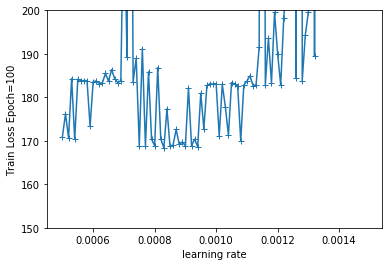

In [63]:
data=pd.read_csv('data_lr_experiment_d16.csv')
data['train_loss']=data['train_loss'].fillna(100000)
plt.plot(data['learning_rate'],data['train_loss'],'+-')
plt.xlabel('learning rate')
plt.ylabel('Train Loss Epoch=100')
plt.ylim(150,200)

In [8]:
(0.0012-0.0008)/100

3.999999999999999e-06

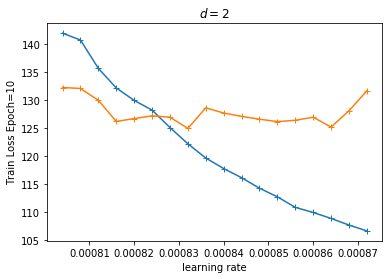

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
n = 18
data=pd.read_csv('data_unsupervised_lrs_pa0_test_d32.csv')
data['train_loss']=data['train_loss'].fillna(100000)
plt.plot(data['learning_rate'][0:n],data['train_loss'][0:n],'+-')
plt.plot(data['learning_rate'][0:n],data['test_loss'][0:n],'+-')
plt.title('$d=2$ ')
plt.xlabel('learning rate')
plt.ylabel('Train Loss Epoch=10')
#plt.ylim(150,200)
plt.show()

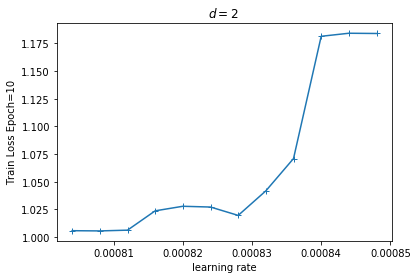

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
n = 12
data=pd.read_csv('data_unsupervised_lrs_pa0_test_d32.csv')
data['train_loss']=data['train_loss'].fillna(100000)
plt.plot(data['learning_rate'][0:n],data['RAMIS'][0:n],'+-')
plt.title('$d=2$ ')
plt.xlabel('learning rate')
plt.ylabel('Train Loss Epoch=10')
#plt.ylim(150,200)
plt.show()

In [117]:
data[0:15]

,Unnamed: 0,k,learning_rate,train_loss,test_loss,RAMIS
0,0,0.0,0.000804,141.929606,132.255757,1.005730
1,1,1.0,0.000808,140.724399,132.088315,1.005522
2,2,2.0,0.000812,135.672328,129.979390,1.006207
3,3,3.0,0.000816,132.180319,126.214258,1.023671
4,4,4.0,0.000820,129.965687,126.721104,1.027800
5,5,5.0,0.000824,128.229322,127.213672,1.027102
6,6,6.0,0.000828,125.127366,126.969951,1.019546
7,7,7.0,0.000832,122.231158,124.967812,1.041736
8,8,8.0,0.000836,119.695188,128.634734,1.070942
9,9,9.0,0.000840,117.817165,127.711941,1.181454


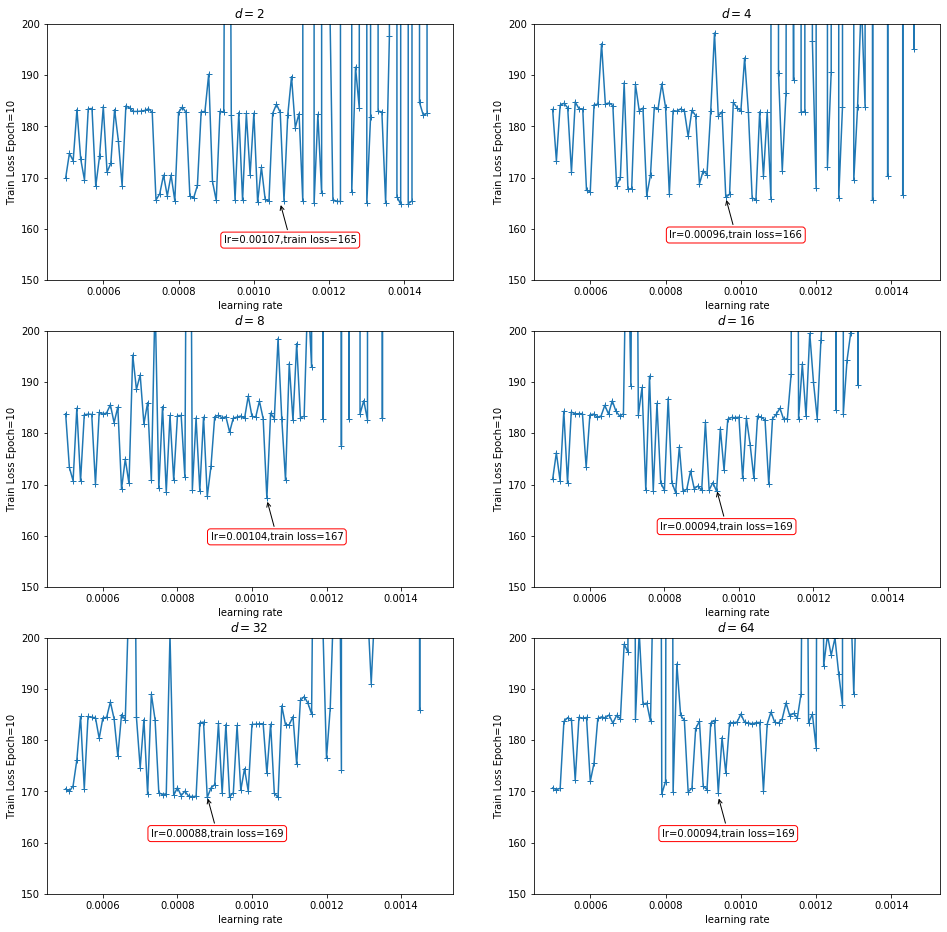

In [43]:
plt.figure(figsize=(16,16))       # set dimensions of the figure
x = np.linspace(0,2*np.pi, 100)
i = 1
learning_rates=[0.00107,0.00096,0.00104,0.00094,0.00088,0.00094]
train_loss=[165,166,167,169,169,169]
point_annotation_x = []
point_annotation_y = []
for n in [2,4,8,16,32,64]:
    plt.subplot(3,2, i)         # create subplots on a grid with 2 rows and 3 columns
    
    data=pd.read_csv('data_lr_experiment_exp0_d'+str(n)+'.csv')
    data['train_loss']=data['train_loss'].fillna(100000)
    plt.plot(data['learning_rate'],data['train_loss'],'+-')
    plt.title('$d='+str(n)+'$ ')
    plt.xlabel('learning rate')
    plt.ylabel('Train Loss Epoch=10')
    plt.annotate("lr="+str(learning_rates[i-1])+",train loss="+str(train_loss[i-1]), xy=(learning_rates[i-1], train_loss[i-1]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="red"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
    plt.ylim(150,200)            # set no ticks on y-axis
    i = i + 1

plt.show()

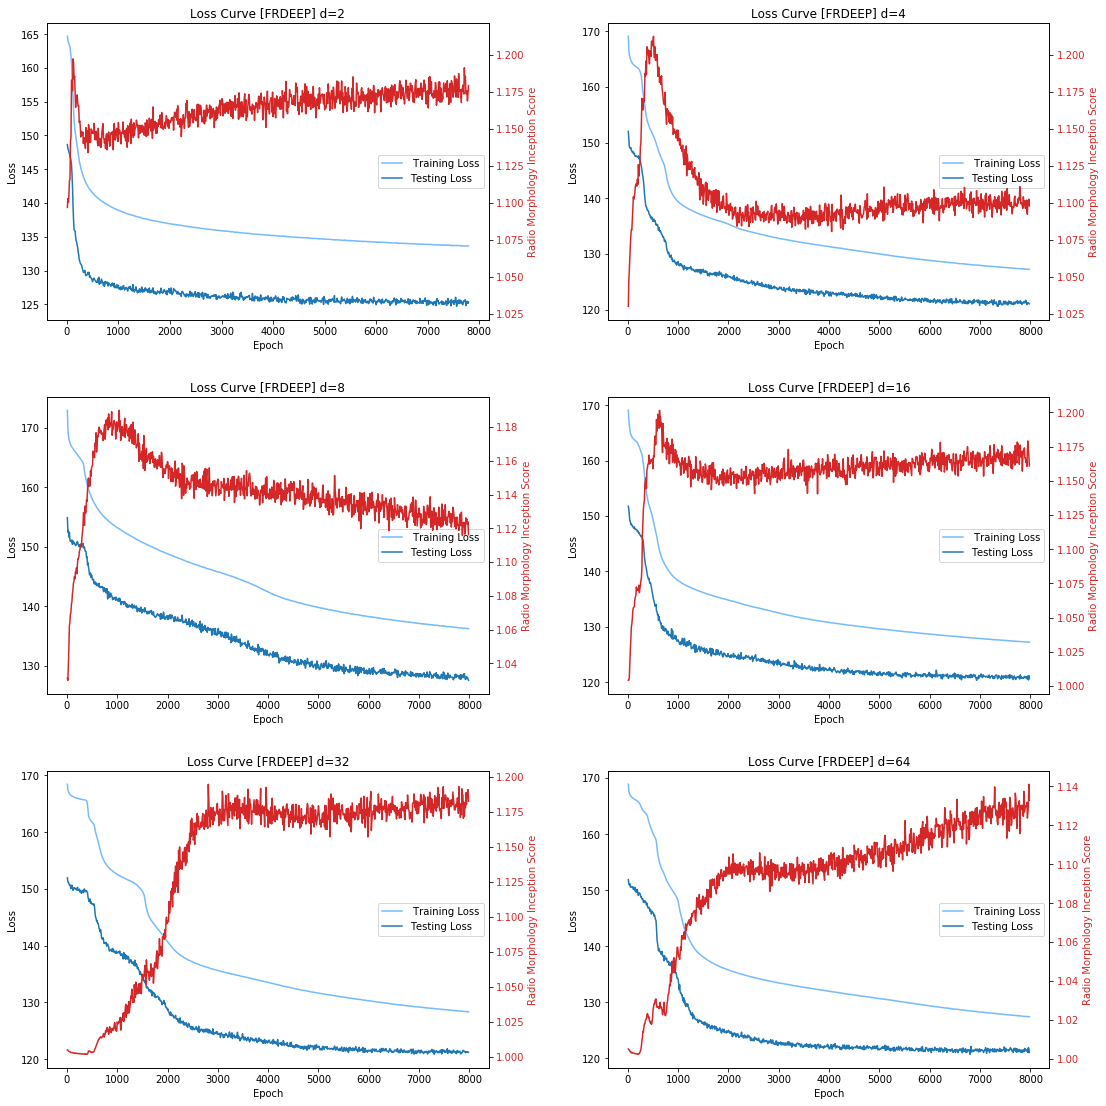

In [66]:
plt.figure(figsize=(16,16))       # set dimensions of the figure

j = 1



# create all axes we need
ax0 = plt.subplot(321)
ax1 = ax0.twinx()
ax2 = plt.subplot(322)
ax3 = ax2.twinx()
ax4 = plt.subplot(323)
ax5 = ax4.twinx()
ax6 = plt.subplot(324)
ax7 = ax6.twinx()
ax8 = plt.subplot(325)
ax9 = ax8.twinx()
ax10 = plt.subplot(326)
ax11 = ax10.twinx()

# share the secondary axes
ax1.get_shared_y_axes().join(ax1, ax3)

    
data=pd.read_csv("data_unsupervised_d2.csv",delimiter=",")

n=int(7800/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])



color = 'tab:red'
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Loss')
ax0.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax0.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax0.tick_params(axis='y')
ax0.legend(loc='center right')


color = 'tab:red'

ax1.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax1.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_title('Loss Curve [FRDEEP] d=2')


    
data=pd.read_csv("data_unsupervised_d4_0_0014.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax2.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax2.tick_params(axis='y')
ax2.legend(loc='center right')

color = 'tab:red'
ax3.set_title('Loss Curve [FRDEEP] d=4')
ax3.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax3.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax3.tick_params(axis='y', labelcolor=color)


data=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax4.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax4.tick_params(axis='y')
ax4.legend(loc='center right')

color = 'tab:red'
ax4.set_title('Loss Curve [FRDEEP] d=8')
ax5.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax5.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax5.tick_params(axis='y', labelcolor=color)


data=pd.read_csv("data_unsupervised_d16.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Loss')
ax6.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax6.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax6.tick_params(axis='y')
ax6.legend(loc='center right')

color = 'tab:red'
ax6.set_title('Loss Curve [FRDEEP] d=16')
ax7.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax7.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax7.tick_params(axis='y', labelcolor=color)


data=pd.read_csv("data_unsupervised_d32.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax8.set_xlabel('Epoch')
ax8.set_ylabel('Loss')
ax8.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax8.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax8.tick_params(axis='y')
ax8.legend(loc='center right')

color = 'tab:red'
ax8.set_title('Loss Curve [FRDEEP] d=32')
ax9.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax9.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax9.tick_params(axis='y', labelcolor=color)




data=pd.read_csv("data_unsupervised_d64.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax10.set_xlabel('Epoch')
ax10.set_ylabel('Loss')
ax10.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax10.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax10.tick_params(axis='y')
ax10.legend(loc='center right')

color = 'tab:red'
ax10.set_title('Loss Curve [FRDEEP] d=64')
ax11.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax11.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax11.tick_params(axis='y', labelcolor=color)


plt.tight_layout(pad=3.0)

plt.show()



In [155]:
latent_d = []
RAMIS = []
test_loss=[]
train_loss =[]
data=pd.read_csv("data_unsupervised_d2.csv",delimiter=",")
n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])


latent_d.append(2)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==7980].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==7980].to_numpy()[0])
train_loss.append(data_2['Avg_Train_Loss'][data_2['Epoch']==7980].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_unsupervised_d4_0_0014.csv",delimiter=",")
n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

latent_d.append(4)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==7980].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==7980].to_numpy()[0])    
train_loss.append(data_2['Avg_Train_Loss'][data_2['Epoch']==7980].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_unsupervised_d8.csv",delimiter=",")
n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

latent_d.append(8)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==7980].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==7980].to_numpy()[0])
train_loss.append(data_2['Avg_Train_Loss'][data_2['Epoch']==7980].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_unsupervised_d16.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

latent_d.append(16)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==7980].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==7980].to_numpy()[0])
train_loss.append(data_2['Avg_Train_Loss'][data_2['Epoch']==7980].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_unsupervised_d32.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

latent_d.append(32)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==7980].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==7980].to_numpy()[0])
train_loss.append(data_2['Avg_Train_Loss'][data_2['Epoch']==7980].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_unsupervised_d64.csv",delimiter=",")

n=int(7990/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])

latent_d.append(64)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==7980].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==7980].to_numpy()[0])
train_loss.append(data_2['Avg_Train_Loss'][data_2['Epoch']==7980].to_numpy()[0])

In [152]:
RAMIS

[1.1713002562522887,
 1.0979318380355836,
 1.1161878108978271,
 1.1608514785766602,
 1.1824185490608214,
 1.1330412864685058]

In [153]:
test_loss

[125.70886154174805,
 121.03930178833009,
 127.61227600097656,
 120.64367236328125,
 121.2168720703125,
 121.05654687500001]

In [156]:
train_loss

[133.5682792117957,
 127.23621147310855,
 136.2896763923722,
 127.20394669164793,
 128.32746348248105,
 127.41464267923375]

NameError: name 'ax' is not defined

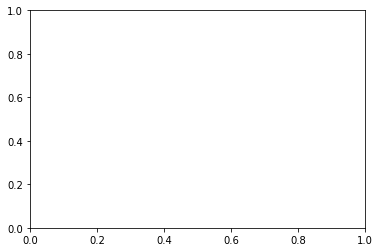

In [83]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax.set_xscale('log', basex=2)

ax1.plot(latent_d,RAMIS,'-+',color='red')
ax2.plot(latent_d,test_loss,'-+',color='red')

plt.show()


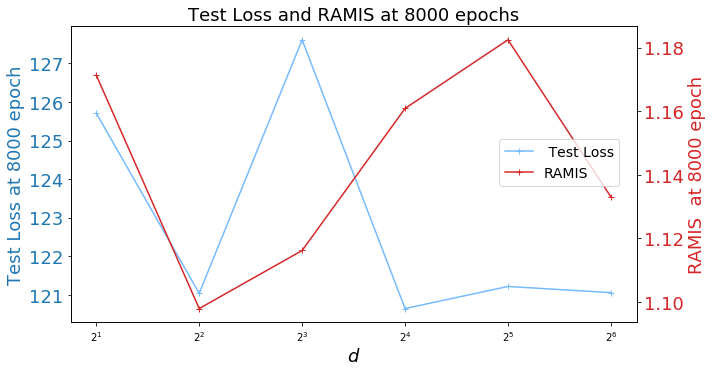

In [101]:
# Create some mock data

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xscale('log', basex=2)
ax1.set_xlabel('$d$',fontsize=18)
ax1.set_ylabel('Test Loss at 8000 epoch',color=color,fontsize=18)
ax1.plot(latent_d,test_loss,'-+',label=' Test Loss', color='xkcd:sky blue')
ax1.tick_params(axis='y',labelcolor=color,labelsize=18)
#ax1.legend(loc='center right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('RAMIS  at 8000 epoch', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(latent_d,RAMIS,'-+',label='RAMIS',color=color)
ax2.tick_params(axis='y', labelcolor=color,labelsize=18)

fig.legend(loc=(0.7,0.5),fontsize=14)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Test Loss and RAMIS at 8000 epochs',fontsize=18)
plt.show()

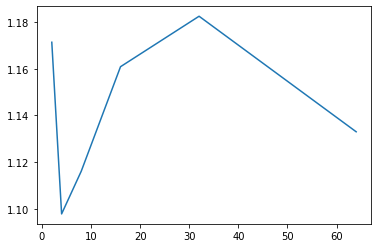

In [88]:
plt.plot(latent_d,RAMIS)

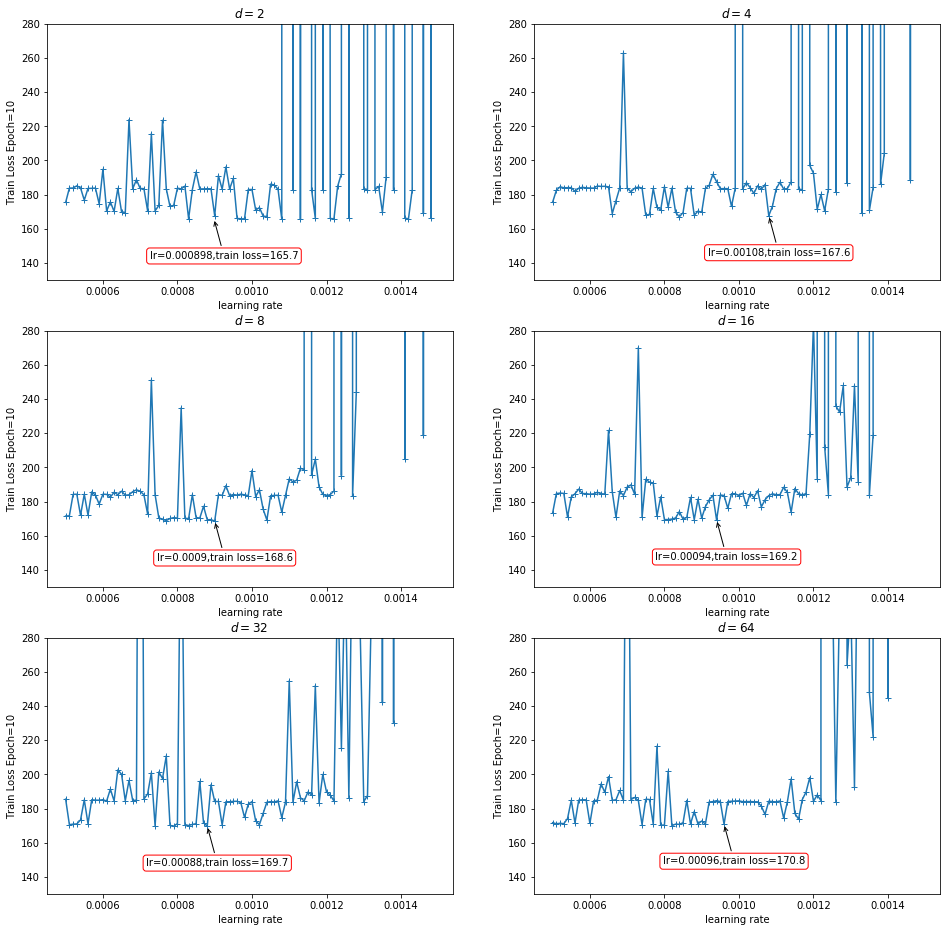

In [63]:
plt.figure(figsize=(16,16))       # set dimensions of the figure
x = np.linspace(0,2*np.pi, 100)
i = 1
learning_rates=[0.000898,0.00108,0.00090,0.00094,0.00088,0.00096]
train_loss=[165.7,167.6,168.6,169.2,169.7,170.8]

for n in [2,4,8,16,32,64]:
    plt.subplot(3,2, i)         # create subplots on a grid with 2 rows and 3 columns
    
    data=pd.read_csv('data_lr_experiment_sup_d'+str(n)+'.csv')
    data['train_loss']=data['train_loss'].fillna(100000)
    plt.plot(data['learning_rate'],data['train_loss'],'+-')
    plt.title('$d='+str(n)+'$ ')
    plt.xlabel('learning rate')
    plt.ylabel('Train Loss Epoch=10')
    plt.annotate("lr="+str(learning_rates[i-1])+",train loss="+str(train_loss[i-1]), xy=(learning_rates[i-1], train_loss[i-1]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="red"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
    
    plt.ylim(130,280)            # set no ticks on y-axis
    i = i + 1

plt.show()

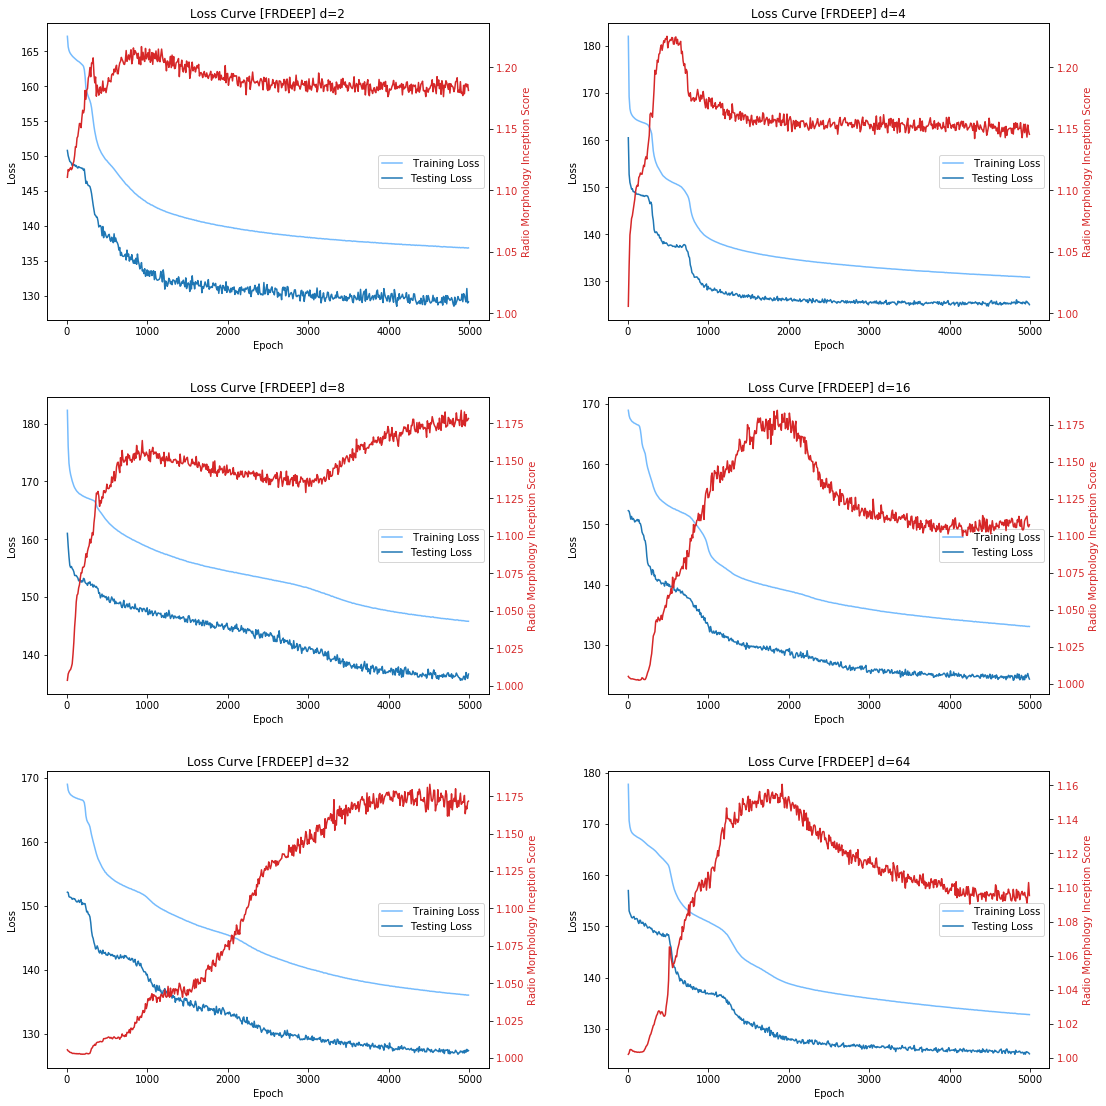

In [9]:
plt.figure(figsize=(16,16))       # set dimensions of the figure

j = 1



# create all axes we need
ax0 = plt.subplot(321)
ax1 = ax0.twinx()
ax2 = plt.subplot(322)
ax3 = ax2.twinx()
ax4 = plt.subplot(323)
ax5 = ax4.twinx()
ax6 = plt.subplot(324)
ax7 = ax6.twinx()
ax8 = plt.subplot(325)
ax9 = ax8.twinx()
ax10 = plt.subplot(326)
ax11 = ax10.twinx()

# share the secondary axes
ax1.get_shared_y_axes().join(ax1, ax3)

    
data=pd.read_csv("data_supervised_d2.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])



color = 'tab:red'
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Loss')
ax0.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax0.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax0.tick_params(axis='y')
ax0.legend(loc='center right')


color = 'tab:red'

ax1.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax1.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_title('Loss Curve [FRDEEP] d=2')


    
data=pd.read_csv("data_supervised_d4.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax2.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax2.tick_params(axis='y')
ax2.legend(loc='center right')

color = 'tab:red'
ax3.set_title('Loss Curve [FRDEEP] d=4')
ax3.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax3.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax3.tick_params(axis='y', labelcolor=color)


data=pd.read_csv("data_supervised_d8.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax4.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax4.tick_params(axis='y')
ax4.legend(loc='center right')

color = 'tab:red'
ax4.set_title('Loss Curve [FRDEEP] d=8')
ax5.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax5.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax5.tick_params(axis='y', labelcolor=color)


data=pd.read_csv("data_supervised_d16.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Loss')
ax6.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax6.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax6.tick_params(axis='y')
ax6.legend(loc='center right')

color = 'tab:red'
ax6.set_title('Loss Curve [FRDEEP] d=16')
ax7.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax7.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax7.tick_params(axis='y', labelcolor=color)


data=pd.read_csv("data_supervised_d32.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax8.set_xlabel('Epoch')
ax8.set_ylabel('Loss')
ax8.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax8.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax8.tick_params(axis='y')
ax8.legend(loc='center right')

color = 'tab:red'
ax8.set_title('Loss Curve [FRDEEP] d=32')
ax9.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax9.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax9.tick_params(axis='y', labelcolor=color)




data=pd.read_csv("data_supervised_d64.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((6,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
    data_2['Epoch'][i] = i*10
    data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
    data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
    data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])




color = 'tab:red'
ax10.set_xlabel('Epoch')
ax10.set_ylabel('Loss')
ax10.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax10.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax10.tick_params(axis='y')
ax10.legend(loc='center right')

color = 'tab:red'
ax10.set_title('Loss Curve [FRDEEP] d=64')
ax11.set_ylabel('Radio Morphology Inception Score', color=color)  # we already handled the x-label with ax1
ax11.plot(data_2['Epoch'][1:], data_2['Avg_inception'][1:], label='Accuracy',color=color)
ax11.tick_params(axis='y', labelcolor=color)


plt.tight_layout(pad=3.0)

plt.show()



In [138]:
data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])

KeyError: 'number_FR1'

In [158]:
latent_d = []
RAMIS = []
test_loss=[]
fr1_count = []
fr2_count = []

data=pd.read_csv("data_supervised_d2.csv",delimiter=",")
n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])


latent_d.append(2)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==4990].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==4990].to_numpy()[0])
fr1_count.append(data_2['Avg_FRI'][data_2['Epoch']==4990].to_numpy()[0])
fr2_count.append(data_2['Avg_FRII'][data_2['Epoch']==4990].to_numpy()[0])


#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_supervised_d4.csv",delimiter=",")
n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])

latent_d.append(4)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==4990].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==4990].to_numpy()[0])    
fr1_count.append(data_2['Avg_FRI'][data_2['Epoch']==4990].to_numpy()[0])
fr2_count.append(data_2['Avg_FRII'][data_2['Epoch']==4990].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_supervised_d8.csv",delimiter=",")
n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])

latent_d.append(8)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==4990].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==4990].to_numpy()[0])
fr1_count.append(data_2['Avg_FRI'][data_2['Epoch']==4990].to_numpy()[0])
fr2_count.append(data_2['Avg_FRII'][data_2['Epoch']==4990].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_supervised_d16.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])

latent_d.append(16)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==4990].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==4990].to_numpy()[0])
fr1_count.append(data_2['Avg_FRI'][data_2['Epoch']==4990].to_numpy()[0])
fr2_count.append(data_2['Avg_FRII'][data_2['Epoch']==4990].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_supervised_d32.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])

latent_d.append(32)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==4990].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==4990].to_numpy()[0])
fr1_count.append(data_2['Avg_FRI'][data_2['Epoch']==4990].to_numpy()[0])
fr2_count.append(data_2['Avg_FRII'][data_2['Epoch']==4990].to_numpy()[0])
#--------------------------------------------------------------------------------------------------------------------
data=pd.read_csv("data_supervised_d64.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])

latent_d.append(64)
RAMIS.append(data_2['Avg_inception'][data_2['Epoch']==4990].to_numpy()[0])
test_loss.append(data_2['Avg_Test_Loss'][data_2['Epoch']==4990].to_numpy()[0])
fr1_count.append(data_2['Avg_FRI'][data_2['Epoch']==4990].to_numpy()[0])
fr2_count.append(data_2['Avg_FRII'][data_2['Epoch']==4990].to_numpy()[0])

In [159]:
fraction_fr2=(((100-np.asarray(fr1_count))+np.asarray(fr2_count)/200.)*(1/100.)).tolist()

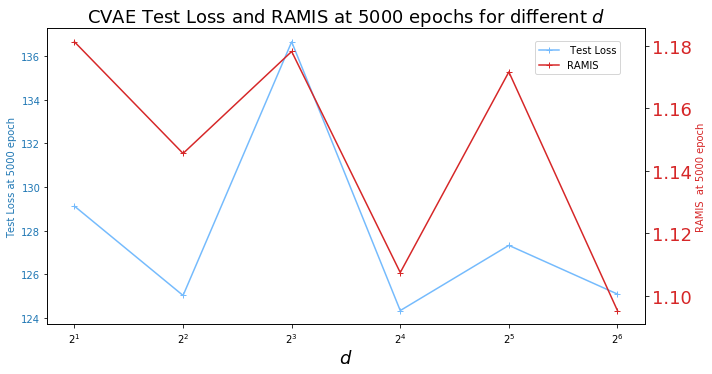

In [160]:
# Create some mock data

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xscale('log', basex=2)
ax1.set_xlabel('$d$',fontsize=18)
ax1.set_ylabel('Test Loss at 5000 epoch',color=color)
ax1.plot(latent_d,test_loss,'-+',label=' Test Loss', color='xkcd:sky blue')
ax1.tick_params(axis='y',labelcolor=color)
#ax1.legend(loc='center right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('RAMIS  at 5000 epoch', color=color)  # we already handled the x-label with ax1
ax2.plot(latent_d,RAMIS,'-+',label='RAMIS',color=color)
ax2.tick_params(axis='y', labelcolor=color,labelsize=18)

fig.legend(loc=(0.75,0.8))
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('CVAE Test Loss and RAMIS at 5000 epochs for different $d$',fontsize=18)
plt.show()

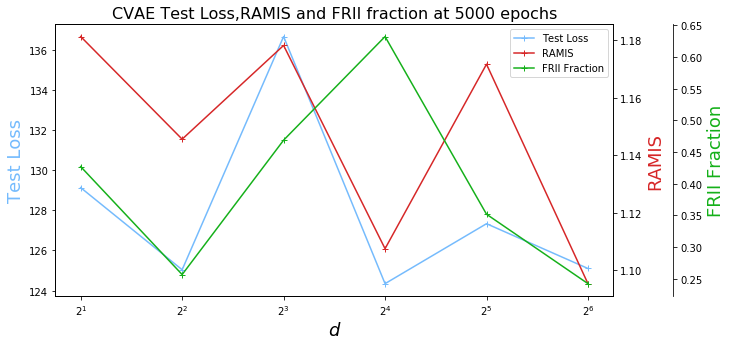

In [161]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(10,5))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_xlabel("$d$",fontsize=18)
host.set_ylabel("Test Loss",fontsize=18)
par1.set_ylabel("RAMIS",fontsize=18)
par2.set_ylabel("FRII Fraction",fontsize=18)

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(latent_d,test_loss,'-+' ,color='xkcd:sky blue',label="Test Loss")
p2, = par1.plot(latent_d,RAMIS, '-+',color='tab:red', label="RAMIS")
p3, = par2.plot(latent_d,fraction_fr2, '-+',color='xkcd:green', label="FRII Fraction")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks  
par2.set_xscale('log', basex=2)
#par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color('xkcd:sky blue')
par1.yaxis.label.set_color('tab:red')
par2.yaxis.label.set_color('xkcd:green')
plt.title('CVAE Test Loss,RAMIS and FRII fraction at 5000 epochs',fontsize=16)
plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

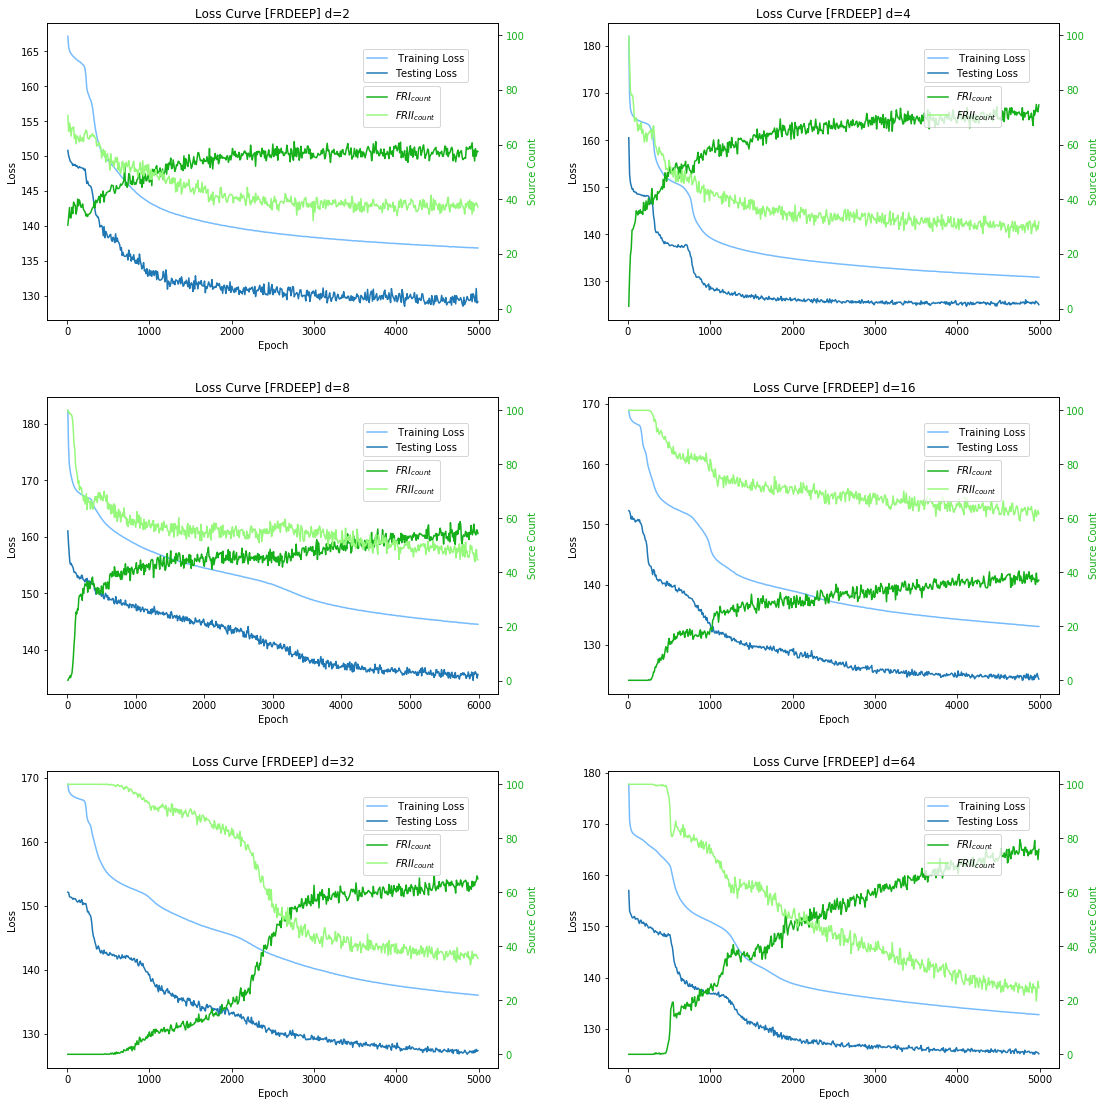

In [27]:
plt.figure(figsize=(16,16))       # set dimensions of the figure

j = 1



# create all axes we need
ax0 = plt.subplot(321)
ax1 = ax0.twinx()
ax2 = plt.subplot(322)
ax3 = ax2.twinx()
ax4 = plt.subplot(323)
ax5 = ax4.twinx()
ax6 = plt.subplot(324)
ax7 = ax6.twinx()
ax8 = plt.subplot(325)
ax9 = ax8.twinx()
ax10 = plt.subplot(326)
ax11 = ax10.twinx()

# share the secondary axes
ax1.get_shared_y_axes().join(ax1, ax3)

    
data=pd.read_csv("data_supervised_d2.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])



color = 'tab:red'
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Loss')
ax0.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax0.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax0.tick_params(axis='y')



color = 'tab:red'

ax1.set_ylabel('Source Count', color='xkcd:green')  # we already handled the x-label with ax1
ax1.plot(data_2['Epoch'][1:], data_2['Avg_FRI'][1:], label='$FRI_{count}$',color='xkcd:green')
ax1.plot(data_2['Epoch'][1:], data_2['Avg_FRII'][1:], label='$FRII_{count}$',color='xkcd:light green')
ax0.legend(loc=(0.7,0.8))
ax1.legend(loc=(0.7,0.65))

ax1.tick_params(axis='y', labelcolor='xkcd:green')

ax1.set_title('Loss Curve [FRDEEP] d=2')


    
data=pd.read_csv("data_supervised_d4.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])




color = 'tab:red'
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax2.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax2.tick_params(axis='y')
ax2.legend(loc='center right')

color = 'tab:red'
ax3.set_title('Loss Curve [FRDEEP] d=4')
ax3.set_ylabel('Source Count', color='xkcd:green')  # we already handled the x-label with ax1
ax3.plot(data_2['Epoch'][1:], data_2['Avg_FRI'][1:], label='$FRI_{count}$',color='xkcd:green')
ax3.plot(data_2['Epoch'][1:], data_2['Avg_FRII'][1:], label='$FRII_{count}$',color='xkcd:light green')
ax3.tick_params(axis='y', labelcolor='xkcd:green')
ax2.legend(loc=(0.7,0.8))
ax3.legend(loc=(0.7,0.65))

data=pd.read_csv("data_supervised_d8.csv",delimiter=",")

n=int(6000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])




color = 'tab:red'
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax4.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax4.tick_params(axis='y')
ax4.legend(loc='center right')

color = 'tab:red'
ax4.set_title('Loss Curve [FRDEEP] d=8')
ax5.set_ylabel('Source Count', color='xkcd:green')  # we already handled the x-label with ax1
ax5.plot(data_2['Epoch'][1:], data_2['Avg_FRI'][1:], label='$FRI_{count}$',color='xkcd:green')
ax5.plot(data_2['Epoch'][1:], data_2['Avg_FRII'][1:], label='$FRII_{count}$',color='xkcd:light green')
ax5.tick_params(axis='y', labelcolor='xkcd:green')
ax4.legend(loc=(0.7,0.8))
ax5.legend(loc=(0.7,0.65))

data=pd.read_csv("data_supervised_d16.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])




color = 'tab:red'
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Loss')
ax6.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax6.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax6.tick_params(axis='y')
ax6.legend(loc='center right')

color = 'tab:red'
ax6.set_title('Loss Curve [FRDEEP] d=16')
ax7.set_ylabel('Source Count', color='xkcd:green')  # we already handled the x-label with ax1
ax7.plot(data_2['Epoch'][1:], data_2['Avg_FRI'][1:], label='$FRI_{count}$',color='xkcd:green')
ax7.plot(data_2['Epoch'][1:], data_2['Avg_FRII'][1:], label='$FRII_{count}$',color='xkcd:light green')
ax7.tick_params(axis='y', labelcolor='xkcd:green')
ax6.legend(loc=(0.7,0.8))
ax7.legend(loc=(0.7,0.65))

data=pd.read_csv("data_supervised_d32.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])




color = 'tab:red'
ax8.set_xlabel('Epoch')
ax8.set_ylabel('Loss')
ax8.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax8.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax8.tick_params(axis='y')
ax8.legend(loc='center right')

color = 'tab:red'
ax8.set_title('Loss Curve [FRDEEP] d=32')
ax9.set_ylabel('Source Count', color='xkcd:green')  # we already handled the x-label with ax1
ax9.plot(data_2['Epoch'][1:], data_2['Avg_FRI'][1:], label='$FRI_{count}$',color='xkcd:green')
ax9.plot(data_2['Epoch'][1:], data_2['Avg_FRII'][1:], label='$FRII_{count}$',color='xkcd:light green')
ax9.tick_params(axis='y', labelcolor='xkcd:green')

ax8.legend(loc=(0.7,0.8))
ax9.legend(loc=(0.7,0.65))


data=pd.read_csv("data_supervised_d64.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])




color = 'tab:red'
ax10.set_xlabel('Epoch')
ax10.set_ylabel('Loss')
ax10.plot(data_2['Epoch'][1:], data_2['Avg_Train_Loss'][1:],'-',label=' Training Loss', color='xkcd:sky blue')
ax10.plot(data_2['Epoch'][1:], data_2['Avg_Test_Loss'][1:],'-', label='Testing Loss',color='tab:blue')
ax10.tick_params(axis='y')
ax10.legend(loc='center right')

color = 'tab:red'
ax10.set_title('Loss Curve [FRDEEP] d=64')
ax11.set_ylabel('Source Count', color='xkcd:green')  # we already handled the x-label with ax1
ax11.plot(data_2['Epoch'][1:], data_2['Avg_FRI'][1:], label='$FRI_{count}$',color='xkcd:green')
ax11.plot(data_2['Epoch'][1:], data_2['Avg_FRII'][1:], label='$FRII_{count}$',color='xkcd:light green')
ax11.tick_params(axis='y', labelcolor='xkcd:green')

ax10.legend(loc=(0.7,0.8))
ax11.legend(loc=(0.7,0.65))
plt.tight_layout(pad=3.0)

plt.show()



In [57]:
data=pd.read_csv("data_supervised_d64.csv",delimiter=",")

n=int(5000/10)

data_2 = np.zeros((8,n)).T

columns = ['Epoch','Avg_Train_Loss', 'Avg_Test_Loss', 'Avg_Sigma_clipped','Avg_VAE_efficiency','Avg_inception','Avg_FRI','Avg_FRII']
data_2 = pd.DataFrame(data_2, columns=columns)

i=0
for i in range (1,n):
     data_2['Epoch'][i] = i*10
     data_2['Avg_Train_Loss'][i]=np.mean(data['Train_Loss'][i*10:(i*10)+10])
     data_2['Avg_Test_Loss'][i]=np.mean(data['Test_Loss'][i*10:(i*10)+10])
     data_2['Avg_inception'][i]=np.mean(data['Inception_score'][i*10:(i*10)+10])
     data_2['Avg_FRI'][i]=np.mean(data['number_FR1'][i*10:(i*10)+10])
     data_2['Avg_FRII'][i]=np.mean(data['number_FR2'][i*10:(i*10)+10])

In [58]:
data_2

,Epoch,Avg_Train_Loss,Avg_Test_Loss,Avg_Sigma_clipped,Avg_VAE_efficiency,Avg_inception,Avg_FRI,Avg_FRII
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,10.0,177.735043,156.984485,0.0,0.0,1.002133,0.0,100.0
2,20.0,170.644816,153.011928,0.0,0.0,1.002873,0.0,100.0
3,30.0,169.446422,152.537920,0.0,0.0,1.004801,0.0,100.0
4,40.0,168.777372,152.188188,0.0,0.0,1.004952,0.0,100.0
...,...,...,...,...,...,...,...,...
495,4950.0,132.816113,125.505904,0.0,0.0,1.094009,73.8,24.4
496,4960.0,132.779061,125.475346,0.0,0.0,1.090919,75.4,19.7
497,4970.0,132.786762,125.389984,0.0,0.0,1.095833,75.3,24.1
498,4980.0,132.768817,125.292498,0.0,0.0,1.102932,72.1,27.0
